In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
import sys
sys.path.append("..")
from dtw import *

## Basic Example

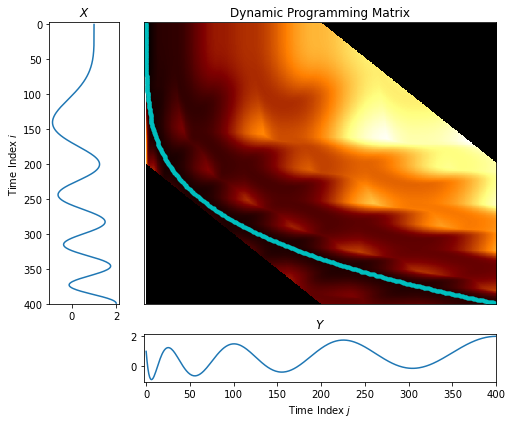

In [2]:
#Make dynamic time warping example
np.random.seed(100)
t1 = np.linspace(0, 1, 400)
t1 = t1
t2 = np.sqrt(t1)
t1 = t1**2
N = len(t1)

X = np.cos(8*np.pi*t1) + t1
Y = np.cos(8*np.pi*t2) + t2

cost, path, S = cdtw(X, Y, 200, return_S=True)
S = S.toarray()

fac = 0.6
left_lim = -3
plt.figure(figsize=(fac*14, fac*10))

plt.subplot2grid((5, 6), (0, 0), rowspan=4)
plt.plot(X, np.arange(X.size))
plt.ylim([Y.size, left_lim])
plt.title("$X$")
plt.ylabel("Time Index $i$")

plt.subplot2grid((5, 6), (0, 1), rowspan=4, colspan=4)
plt.imshow(S, interpolation = 'nearest', cmap=plt.get_cmap('afmhot'), aspect = 'auto')
plt.plot(path[:, 1], path[:, 0], 'c.')
plt.xlim([left_lim, Y.size])
plt.ylim([X.size, -1])
plt.xticks([])
plt.yticks([])
plt.title("Dynamic Programming Matrix")

plt.subplot2grid((5, 6), (4, 1), colspan=4)
plt.plot(Y)
plt.xlim([left_lim, Y.size])
plt.title("$Y$")
plt.xlabel("Time Index $j$")
plt.tight_layout()

plt.show()

## Triangle Inequality

ab =  1.013 , bc =  3.022001 , ac =  70.03499
1.013 3.022 70.035


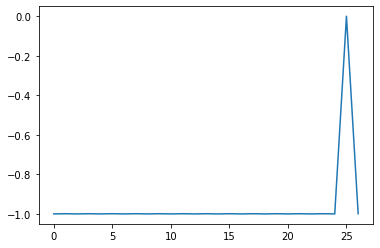

In [3]:
m = 13
n = 22
eps = 0.001
a = np.array([-1, -1-eps]*m + [0, -1])[1::]
b = np.array([-1, 1, -1])
c = np.array([0] + [1+eps, 1]*n)
ab, _ = cdtw(a, b)
bc, _ = cdtw(b, c)
ac, _ = cdtw(a, c)
print("ab = ", ab, ", bc = ", bc, ", ac = ", ac)
plt.plot(a)
print(1+m*eps, 3+n*eps, (m+n)*(2+eps))

## Stability

In [4]:
n = 1000
x = np.array([0, 1])
y = np.linspace(0, 1, n+1)
dist, _ = cdtw(x, y)
print("dist = ", dist, "n/4 + 1 = ", n/4+1)

dist =  250.00002 n/4 + 1 =  251.0
